<a href="https://colab.research.google.com/github/viddev1/tensorflow_notebooks/blob/main/notebooks/tf_transfer_learning_fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Mon May 30 01:54:34 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# Get helper_functions.py script from course GitHub
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py 

# Import helper functions we're going to use
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

--2022-05-31 08:45:15--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-05-31 08:45:16 (110 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [23]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2022-05-31 09:00:15--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.2.112, 142.250.73.208, 142.250.65.80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.2.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   277MB/s    in 0.6s    

2022-05-31 09:00:16 (277 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [24]:
unzip_data("10_food_classes_10_percent.zip")

In [ ]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [25]:
train_dir_10_percent = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [ ]:
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=32)
test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                           image_size=IMG_SIZE,
                                                                           label_mode="categorical")

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
train_data_10_percent, test_data_10_percent

(<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>,
 <BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>)

In [ ]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
for images, labels in train_data_10_percent.take(1):
  print(images, labels)

tf.Tensor(
[[[[7.44454727e+01 5.54454727e+01 2.32187500e+01]
   [7.20966187e+01 5.34241066e+01 1.94416447e+01]
   [8.41734695e+01 6.61734695e+01 2.80223198e+01]
   ...
   [1.14333401e+01 6.43334055e+00 2.43334031e+00]
   [1.03064327e+01 5.30643272e+00 1.30643284e+00]
   [1.00580359e+01 5.05803585e+00 1.05803585e+00]]

  [[7.52471313e+01 5.52471313e+01 2.08453445e+01]
   [7.42598877e+01 5.42598877e+01 1.91438122e+01]
   [8.27920990e+01 6.30519791e+01 2.52474499e+01]
   ...
   [8.78573608e+00 4.78573608e+00 1.78573608e+00]
   [1.09378176e+01 6.93781805e+00 3.93781805e+00]
   [1.04106789e+01 6.41067886e+00 3.43140793e+00]]

  [[7.16881332e+01 5.01613541e+01 1.23488522e+01]
   [7.64177322e+01 5.48909454e+01 1.63641586e+01]
   [8.72863541e+01 6.64869232e+01 2.54585457e+01]
   ...
   [5.73216438e+00 4.02234316e+00 4.22517776e-01]
   [6.87498665e+00 5.16516542e+00 1.40177250e+00]
   [4.35264349e+00 2.64282227e+00 0.00000000e+00]]

  ...

  [[1.01370224e+02 7.43702240e+01 3.37022614e+00]
   [1

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

base_model.trainable=False

inputs = tf.keras.layers.Input(shape=(224, 224, 3), name='input layer')

x = base_model(inputs)

print(f"shape after base model: {x.shape}")

x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"After GlobalAveragePooling Layer: {x.shape}")

outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

model_0 = tf.keras.Model(inputs, outputs)

model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"]
                )

history_10_percent = model_0.fit(train_data_10_percent,
                                 epochs=5,
                                 steps_per_epoch=len(train_data_10_percent),
                                 validation_data=test_data_10_percent,
                                 validation_steps=len(test_data_10_percent),
                                 callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_feature_extract")]
                                 )

16719872/16705208 [==============================] - 0s 0us/step
shape after base model: (None, 7, 7, 1280)
After GlobalAveragePooling Layer: (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extract/20220530-015447
Epoch 1/5
24/24 [==============================] - 26s 436ms/step - loss: 1.8738 - accuracy: 0.4253 - val_loss: 1.3190 - val_accuracy: 0.7144
Epoch 2/5
24/24 [==============================] - 14s 541ms/step - loss: 1.1203 - accuracy: 0.7587 - val_loss: 0.9095 - val_accuracy: 0.8004
Epoch 3/5
24/24 [==============================] - 11s 461ms/step - loss: 0.8260 - accuracy: 0.8133 - val_loss: 0.7392 - val_accuracy: 0.8260
Epoch 4/5
24/24 [==============================] - 8s 337ms/step - loss: 0.6681 - accuracy: 0.8427 - val_loss: 0.6544 - val_accuracy: 0.8364
Epoch 5/5
24/24 [==============================] - 8s 327ms/step - loss: 0.5721 - accuracy: 0.8653 - val_loss: 0.5968 - val_accuracy: 0.8420


In [ ]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer)

0 <keras.engine.input_layer.InputLayer object at 0x7f14095dd750>
1 <keras.layers.preprocessing.image_preprocessing.Rescaling object at 0x7f140b251f90>
2 <keras.layers.preprocessing.normalization.Normalization object at 0x7f14097d6d50>
3 <keras.layers.convolutional.ZeroPadding2D object at 0x7f14095f0510>
4 <keras.layers.convolutional.Conv2D object at 0x7f1409767a50>
5 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f1409778c90>
6 <keras.layers.core.activation.Activation object at 0x7f140891df90>
7 <keras.layers.convolutional.DepthwiseConv2D object at 0x7f14088ed490>
8 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f14088ed910>
9 <keras.layers.core.activation.Activation object at 0x7f140888b210>
10 <keras.layers.pooling.GlobalAveragePooling2D object at 0x7f140888bd10>
11 <keras.layers.core.reshape.Reshape object at 0x7f1408901790>
12 <keras.layers.convolutional.Conv2D object at 0x7f1408894dd0>
13 <keras.layers.convolutional

In [ ]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                   

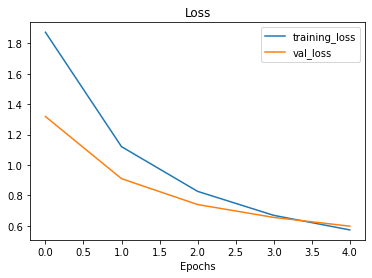

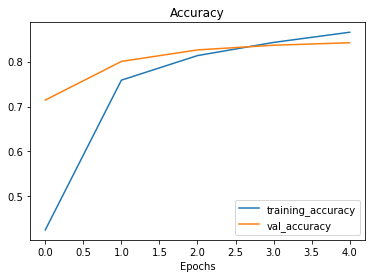

In [ ]:
plot_loss_curves(history_10_percent)

In [ ]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [ ]:
input_shape = (1, 4, 4, 3)

tf.random.set_seed(42)
input_tensor =  tf.random.normal(input_shape)
print(f"Random input tensor:\n {input_tensor} \n")

global_avg_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D global average pooled random tensor: \n {global_avg_pooled_tensor} \n")

print(f"Shape of input random tensor: {input_tensor.shape} ")
print(f"Shape of 2D global avergaed pooled input tensor: {global_avg_pooled_tensor.shape} ")

Random input tensor:
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815629  0.23479682 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]] 

2D global average pooled random tensor: 
 [[-0.09368646 -0.45840448 -0.2885598 ]] 

Shape of input random tensor: (1, 4, 4, 3) 
Shape of 2D global avergaed pooled input tensor: (1, 3) 


In [ ]:
tf.reduce_mean(input_tensor, axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

In [ ]:
input_shape = (1, 4, 4, 3)

tf.random.set_seed(42)
input_tensor =  tf.random.normal(input_shape)
print(f"Random input tensor:\n {input_tensor} \n")

global_avg_pooled_tensor = tf.keras.layers.GlobalMaxPooling2D()(input_tensor)
print(f"2D global max pooled random tensor: \n {global_avg_pooled_tensor} \n")

print(f"Shape of input random tensor: {input_tensor.shape} ")
print(f"Shape of 2D global max pooled input tensor: {global_avg_pooled_tensor.shape} ")

Random input tensor:
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815629  0.23479682 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]] 

2D global max pooled random tensor: 
 [[0.9058464 1.1603122 1.6994323]] 

Shape of input random tensor: (1, 4, 4, 3) 
Shape of 2D global max pooled input tensor: (1, 3) 


In [ ]:
tf.reduce_max(input_tensor, axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0.9058464, 1.1603122, 1.6994323]], dtype=float32)>

In [3]:
# Download and unzip data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data("10_food_classes_1_percent.zip")

# Create training and test dirs
train_dir_1_percent = "10_food_classes_1_percent/train/"
test_dir = "10_food_classes_1_percent/test/"

--2022-05-31 08:45:57--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.111.128, 142.251.45.112, 142.251.16.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   279MB/s    in 0.5s    

2022-05-31 08:45:58 (279 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [4]:
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/steak'

In [5]:
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                           label_mode="categorical",
                                                                           batch_size=32,
                                                                           image_size=IMG_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [6]:
print(tf.__version__)

2.8.0


In [7]:
from tensorflow import keras
from tensorflow.keras import layers
#from tensorflow.keras.layers.experimental import preprocessing

data_aug = keras.Sequential([
                                      layers.RandomFlip("horizontal"),
                                      layers.RandomRotation(0.2),
                                      layers.RandomZoom(0.2),
                                      layers.RandomHeight(0.2),
                                      layers.RandomWidth(0.2),
                                      #layers.Rescaling(1.0/255)
], name="data_augmentation")

(-0.5, 509.5, 522.5, -0.5)

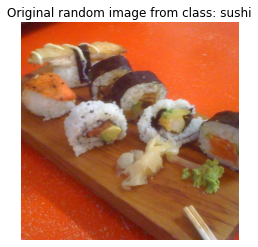

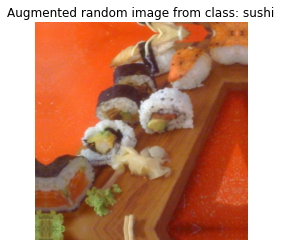

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

target_class = random.choice(train_data_1_percent.class_names)

target_dir="10_food_classes_1_percent/train/" + target_class
random_image= random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"Original random image from class: {target_class}")
plt.axis(False)

augmented_img = data_aug(tf.cast(tf.expand_dims(img, axis=0), tf.float32))
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.)
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False)

In [10]:
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=input_shape, name='input_layer')

x = data_aug(inputs)

x = base_model(x, training=False)

x = layers.GlobalAveragePooling2D(name = "global_average_pooling_layer")(x)

outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

model_1 = keras.Model(inputs, outputs)

model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy']
                )

history_1_percent = model_1.fit(train_data_1_percent,
                                epochs=5,
                                steps_per_epoch=len(train_data_1_percent),
                                validation_data=test_data,
                                validation_steps=int(0.25*len(test_data)),
                                callbacks=[create_tensorboard_callback("transfer_learning", "1_percent_data_augmented")])

Saving TensorBoard log files to: transfer_learning/1_percent_data_augmented/20220531-084812
Epoch 1/5
3/3 [==============================] - 18s 3s/step - loss: 2.4123 - accuracy: 0.0857 - val_loss: 2.2780 - val_accuracy: 0.1234
Epoch 2/5
3/3 [==============================] - 6s 3s/step - loss: 2.1622 - accuracy: 0.1429 - val_loss: 2.1593 - val_accuracy: 0.2188
Epoch 3/5
3/3 [==============================] - 4s 2s/step - loss: 1.9817 - accuracy: 0.3571 - val_loss: 2.0672 - val_accuracy: 0.3109
Epoch 4/5
3/3 [==============================] - 4s 1s/step - loss: 1.8021 - accuracy: 0.5000 - val_loss: 1.9811 - val_accuracy: 0.3520
Epoch 5/5
3/3 [==============================] - 3s 1s/step - loss: 1.6890 - accuracy: 0.5857 - val_loss: 1.8707 - val_accuracy: 0.4161


In [13]:
!tensorboard dev upload --logdir ./transfer_learning/ \
  --name "model_1 data aug 1 percent results" \
  --description "Model_1 TF Hub Feature Extractor model actitectures using 1% of augmented training data images" \
  --one_shot


New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/D9te1VpGT9qvLDD0ulWanA/

[2022-05-31T08:51:26] Started scanning logdir.
[2022-05-31T08:51:28] Total uploaded: 60 scalars, 0 tensors, 2 binary objects (1.6 MB)
[2022-05-31T08:51:28] Done scanning logdir.


Done. View your TensorBoard at https://tensorboard.dev/experiment/D9te1VpGT9qvLDD0ulWanA/


In [14]:
!tensorboard dev list

https://tensorboard.dev/experiment/D9te1VpGT9qvLDD0ulWanA/
	Name                 model_1 data aug 1 percent results
	Description          Comparing two different TF Hub Feature Extractor model actitectures using 10% of training data images
	Id                   D9te1VpGT9qvLDD0ulWanA
	Created              2022-05-31 08:51:26 (22 seconds ago)
	Updated              2022-05-31 08:51:28 (20 seconds ago)
	Runs                 4
	Tags                 5
	Scalars              60
	Tensor bytes         0
	Binary object bytes  1722188
Total: 1 experiment(s)


In [15]:
!tensorboard dev delete --experiment_id D9te1VpGT9qvLDD0ulWanA

Deleted experiment D9te1VpGT9qvLDD0ulWanA.


In [9]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainabl

In [16]:
data_aug(inputs)

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'data_augmentation')>

In [11]:
##printing output from random layer in tf model
from keras import Model
model_output = model_1.get_layer("input_layer").output
m = Model(inputs=model_1.input, outputs=model_output)
pred = m.predict(train_data_1_percent)

In [17]:
results_1_percent_data_aug = model_1.evaluate(test_data)
results_1_percent_data_aug

79/79 [==============================] - 8s 90ms/step - loss: 1.8801 - accuracy: 0.4072


[1.880110502243042, 0.40720000863075256]

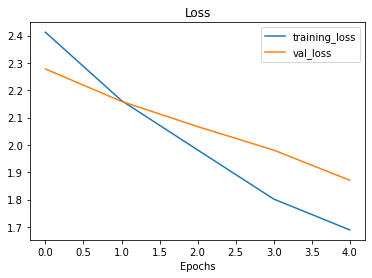

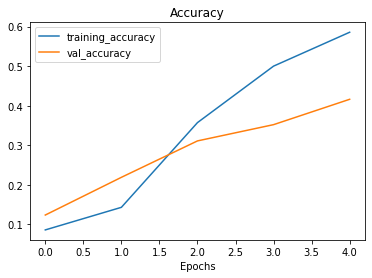

In [18]:
plot_loss_curves(history_1_percent)

In [26]:
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                            label_mode="categorical",
                                                                            image_size=IMG_SIZE
                                                                            )
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [28]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

data_agmnt = Sequential([
                         layers.RandomFlip('horizontal'),
                         layers.RandomHeight(0.2),
                         layers.RandomWidth(0.2),
                         layers.RandomZoom(0.2),
                         layers.RandomRotation(0.2),
                         #layers.Rescaling(1./255)
], name="data_augmentation")

input_shape = (224, 224, 3)

base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=input_shape, name="input_layer")

x = data_agmnt(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

model_2 = tf.keras.Model(inputs, outputs)

model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

In [29]:
checkpoint_path = "ten_percent_model_checkpoint_weights/checkpoint.ckpt"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=False,
                                                         save_freq="epoch",
                                                         verbose=1)

In [30]:
init_epochs = 5
history_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                          epochs=init_epochs,
                                          validation_data=test_data,
                                          validation_steps=int(0.25 * len(test_data)),
                                          callbacks=[create_tensorboard_callback("transfer_learning", "10percent_data_aug"),
                                                     checkpoint_callback]
                                          )

Saving TensorBoard log files to: transfer_learning/10percent_data_aug/20220531-091833
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 2.0686 - accuracy: 0.2893
Epoch 1: saving model to ten_percent_model_checkpoint_weights/checkpoint.ckpt
24/24 [==============================] - 20s 494ms/step - loss: 2.0686 - accuracy: 0.2893 - val_loss: 1.5327 - val_accuracy: 0.6595
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.4027 - accuracy: 0.6573
Epoch 2: saving model to ten_percent_model_checkpoint_weights/checkpoint.ckpt
24/24 [==============================] - 11s 440ms/step - loss: 1.4027 - accuracy: 0.6573 - val_loss: 1.0882 - val_accuracy: 0.7582
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.1049 - accuracy: 0.7307
Epoch 3: saving model to ten_percent_model_checkpoint_weights/checkpoint.ckpt
24/24 [==============================] - 11s 444ms/step - loss: 1.1049 - accuracy: 0.7307 - val_loss: 0.8892 - val_accuracy: 0.7763
Epoch

In [32]:
!tensorboard dev upload --logdir ./transfer_learning/ \
  --name "tf feature extractor model run comparison" \
  --description "abc def ghi" \
  --one_shot


New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/qnU4k8liQbOXoE4PFzEnxw/

[2022-05-31T09:21:42] Started scanning logdir.
[2022-05-31T09:21:45] Total uploaded: 90 scalars, 0 tensors, 3 binary objects (2.5 MB)
[2022-05-31T09:21:45] Done scanning logdir.


Done. View your TensorBoard at https://tensorboard.dev/experiment/qnU4k8liQbOXoE4PFzEnxw/


In [33]:
!tensorboard dev list

https://tensorboard.dev/experiment/qnU4k8liQbOXoE4PFzEnxw/
	Name                 tf feature extractor model run comparison
	Description          abc def ghi
	Id                   qnU4k8liQbOXoE4PFzEnxw
	Created              2022-05-31 09:21:42 (22 seconds ago)
	Updated              2022-05-31 09:21:45 (19 seconds ago)
	Runs                 6
	Tags                 5
	Scalars              90
	Tensor bytes         0
	Binary object bytes  2592260
Total: 1 experiment(s)


In [34]:
!tensorboard dev delete --experiment_id "qnU4k8liQbOXoE4PFzEnxw"

Deleted experiment qnU4k8liQbOXoE4PFzEnxw.


In [35]:
result_10_percent_data_aug = model_2.evaluate(test_data)
result_10_percent_data_aug

79/79 [==============================] - 7s 86ms/step - loss: 0.6984 - accuracy: 0.8096


[0.6984239816665649, 0.8095999956130981]

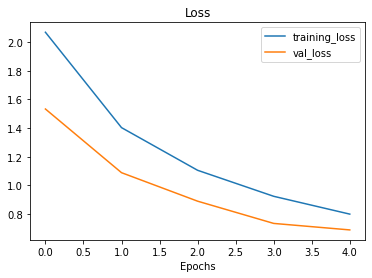

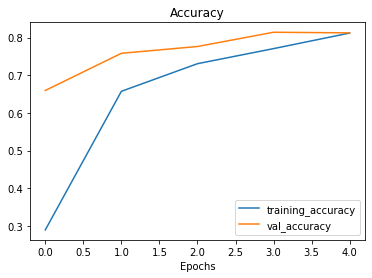

In [36]:
plot_loss_curves(history_10_percent_data_aug)